# Load Necessary Packages

In [1]:
import zipfile

# standard
import pandas as pd
import numpy as np
#import pandas_profiling
import random
import os


# display, plots
from IPython.display import display_html
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns

# warning
import warnings
warnings.filterwarnings("ignore")

# Load Data into DataFrames

In [2]:
articles = pd.read_csv('./data/articles.csv')
customers = pd.read_csv('./data/customers.csv')
transactions = pd.read_csv('./data/transactions_train.csv')

Data wasn't loaded to the Github, however was taken from Kaggle:
https://www.kaggle.com/c/h-and-m-personalized-fashion-recommendations

# EDA - Articles

In [3]:
print(articles.shape)
articles.head()

(105542, 25)


,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
3,110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."


In [6]:
articles.describe()

,article_id,product_code,product_type_no,graphical_appearance_no,colour_group_code,perceived_colour_value_id,perceived_colour_master_id,department_no,index_group_no,section_no,garment_group_no
count,1.055420e+05,105542.000000,105542.000000,1.055420e+05,105542.000000,105542.000000,105542.000000,105542.000000,105542.000000,105542.000000,105542.000000
mean,6.984246e+08,698424.563378,234.861875,1.009515e+06,32.233822,3.206183,7.807972,4532.777833,3.171534,42.664219,1010.438290
std,1.284624e+08,128462.384432,75.049308,2.241359e+04,28.086154,1.563839,5.376727,2712.692011,4.353234,23.260105,6.731023
min,1.087750e+08,108775.000000,-1.000000,-1.000000e+00,-1.000000,-1.000000,-1.000000,1201.000000,1.000000,2.000000,1001.000000
25%,6.169925e+08,616992.500000,252.000000,1.010008e+06,9.000000,2.000000,4.000000,1676.000000,1.000000,20.000000,1005.000000
50%,7.022130e+08,702213.000000,259.000000,1.010016e+06,14.000000,4.000000,5.000000,4222.000000,2.000000,46.000000,1009.000000
75%,7.967030e+08,796703.000000,272.000000,1.010016e+06,52.000000,4.000000,11.000000,7389.000000,4.000000,61.000000,1017.000000
max,9.594610e+08,959461.000000,762.000000,1.010029e+06,93.000000,7.000000,20.000000,9989.000000,26.000000,97.000000,1025.000000


In [7]:
articles.isna().sum()

article_id                        0
product_code                      0
prod_name                         0
product_type_no                   0
product_type_name                 0
product_group_name                0
graphical_appearance_no           0
graphical_appearance_name         0
colour_group_code                 0
colour_group_name                 0
perceived_colour_value_id         0
perceived_colour_value_name       0
perceived_colour_master_id        0
perceived_colour_master_name      0
department_no                     0
department_name                   0
index_code                        0
index_name                        0
index_group_no                    0
index_group_name                  0
section_no                        0
section_name                      0
garment_group_no                  0
garment_group_name                0
detail_desc                     416
dtype: int64

In [8]:
articles.columns

Index(['article_id', 'product_code', 'prod_name', 'product_type_no',
       'product_type_name', 'product_group_name', 'graphical_appearance_no',
       'graphical_appearance_name', 'colour_group_code', 'colour_group_name',
       'perceived_colour_value_id', 'perceived_colour_value_name',
       'perceived_colour_master_id', 'perceived_colour_master_name',
       'department_no', 'department_name', 'index_code', 'index_name',
       'index_group_no', 'index_group_name', 'section_no', 'section_name',
       'garment_group_no', 'garment_group_name', 'detail_desc'],
      dtype='object')

In [9]:
articles.product_code.unique()

array([108775, 110065, 111565, ..., 956217, 957375, 959461])

In [10]:
len(articles.product_type_name.unique())

131

In [11]:
len(articles.product_type_no.unique())

132

In [12]:
articles.product_type_no.unique()

array([253, 306, 304, 302, 273, 252, 254, 272,  72, 532, 295, 256,  73,
        -1, 308, 196,  74,  67,  87, 298,  59, 286,  57, 275, 255, 265,
        75, 307, 274, 259,  69, 297,  94,  81, 245,  71,  70,  66, 264,
        89, 267,  91, 262,  83, 277, 305,  80, 263,  78, 257,  93, 293,
       495, 515,  76, 260,  77,  86,  82, 296, 509,  68, 258, 271,  85,
       283, 496, 161,  49, 268, 276,  84, 299,  60, 144, 270,  79, 156,
        95, 287, 261,  90,  88, 499, 100,  98,  92, 289,  96, 155, 512,
       284, 291, 285, 288, 300, 303, 349, 511, 475, 477, 351, 467, 508,
       503, 465, 230, 504, 476, 326, 494, 514, 498, 525, 231, 492, 489,
       470, 102, 366, 493, 762, 529, 464, 389, 761, 468, 521, 510, 523,
       491, 483])

Taking note that -1 exists as a product_type

In [13]:
articles[articles['product_type_no']==-1]

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
64,156224002,156224,Box 4p Socks,-1,Unknown,Unknown,1010016,Solid,9,Black,...,Tights basic,B,Lingeries/Tights,1,Ladieswear,62,"Womens Nightwear, Socks & Tigh",1021,Socks and Tights,Semi-matte socks with a short shaft. 20 denier.
4015,473954008,473954,OP Cheeky hipster 2p,-1,Unknown,Unknown,1010016,Solid,9,Black,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre hipster briefs with a low waist, li..."
4016,473954013,473954,OP Cheeky hipster 2p,-1,Unknown,Unknown,1010016,Solid,12,Light Beige,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre hipster briefs with a low waist, li..."
4017,473954014,473954,OP Cheeky hipster 2p,-1,Unknown,Unknown,1010016,Solid,17,Yellowish Brown,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre hipster briefs with a low waist, li..."
4018,473954015,473954,OP Cheeky hipster 2p,-1,Unknown,Unknown,1010016,Solid,17,Yellowish Brown,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre hipster briefs with a low waist, li..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104622,925139001,925139,Ruben set,-1,Unknown,Unknown,1010016,Solid,9,Black,...,Other items,C,Ladies Accessories,1,Ladieswear,66,Womens Small accessories,1019,Accessories,Set with a matching iPhone case and protective...
104623,925139002,925139,Ruben set,-1,Unknown,Unknown,1010016,Solid,51,Light Pink,...,Other items,C,Ladies Accessories,1,Ladieswear,66,Womens Small accessories,1019,Accessories,Set with a matching iPhone case and protective...
104624,925139003,925139,Ruben set,-1,Unknown,Unknown,1010016,Solid,61,Light Purple,...,Other items,C,Ladies Accessories,1,Ladieswear,66,Womens Small accessories,1019,Accessories,Set with a matching iPhone case and protective...
104796,927131002,927131,Payton Hood(1),-1,Unknown,Unknown,1010010,Melange,8,Dark Grey,...,Men Sport Woven,S,Sport,26,Sport,22,Men H&M Sport,1005,Jersey Fancy,Track jacket in sturdy cotton-blend jersey wit...


-1 product_type_no appears to designate a missing product number, type

In [14]:
articles.product_group_name.unique()

array(['Garment Upper body', 'Underwear', 'Socks & Tights',
       'Garment Lower body', 'Accessories', 'Items', 'Nightwear',
       'Unknown', 'Underwear/nightwear', 'Shoes', 'Swimwear',
       'Garment Full body', 'Cosmetic', 'Interior textile', 'Bags',
       'Furniture', 'Garment and Shoe care', 'Fun', 'Stationery'],
      dtype=object)

In [15]:
articles.graphical_appearance_no.unique()

array([1010016, 1010017, 1010001, 1010010, 1010019, 1010011, 1010002,
       1010023, 1010005, 1010006, 1010026, 1010020, 1010018, 1010004,
       1010024, 1010008, 1010009, 1010012, 1010014, 1010013, 1010027,
       1010007, 1010021, 1010022,      -1, 1010003, 1010025, 1010028,
       1010015, 1010029])

In [16]:
articles.graphical_appearance_name.unique()

array(['Solid', 'Stripe', 'All over pattern', 'Melange', 'Transparent',
       'Metallic', 'Application/3D', 'Denim', 'Colour blocking', 'Dot',
       'Other structure', 'Contrast', 'Treatment', 'Check', 'Chambray',
       'Front print', 'Glittering/Metallic', 'Mixed solid/pattern',
       'Placement print', 'Other pattern', 'Neps', 'Embroidery', 'Lace',
       'Jacquard', 'Unknown', 'Argyle', 'Slub', 'Mesh', 'Sequin',
       'Hologram'], dtype=object)

In [17]:
articles.colour_group_code.unique()

array([ 9, 10, 11, 12, 13,  7, 71,  6, 73,  8, 52, 43, 15, 31,  3,  5, 51,
       53, 17, 72, 81, 22, 19, 23, 50, 63, 42,  2, 93, 40, 82, 33,  1, 32,
       14, 20, 91, 30, 62, 41, 21, 92, 61, 83, 60,  4, 80, 90, 70, -1])

In [18]:
articles.colour_group_name.unique()

array(['Black', 'White', 'Off White', 'Light Beige', 'Beige', 'Grey',
       'Light Blue', 'Light Grey', 'Dark Blue', 'Dark Grey', 'Pink',
       'Dark Red', 'Greyish Beige', 'Light Orange', 'Silver', 'Gold',
       'Light Pink', 'Dark Pink', 'Yellowish Brown', 'Blue',
       'Light Turquoise', 'Yellow', 'Greenish Khaki', 'Dark Yellow',
       'Other Pink', 'Dark Purple', 'Red', 'Transparent', 'Dark Green',
       'Other Red', 'Turquoise', 'Dark Orange', 'Other', 'Orange',
       'Dark Beige', 'Other Yellow', 'Light Green', 'Other Orange',
       'Purple', 'Light Red', 'Light Yellow', 'Green', 'Light Purple',
       'Dark Turquoise', 'Other Purple', 'Bronze/Copper',
       'Other Turquoise', 'Other Green', 'Other Blue', 'Unknown'],
      dtype=object)

In [19]:
articles.perceived_colour_value_id.unique()

array([ 4,  3,  1,  2,  5,  7,  6, -1])

In [20]:
articles.perceived_colour_value_name.unique()

array(['Dark', 'Light', 'Dusty Light', 'Medium Dusty', 'Bright', 'Medium',
       'Undefined', 'Unknown'], dtype=object)

In [21]:
articles.perceived_colour_master_id.unique()

array([ 5,  9, 11, 12,  2,  4,  6, 18,  1,  3, 15, 13,  7,  8, 20, 19, 14,
       -1, 10, 16])

In [22]:
articles.perceived_colour_master_name.unique()

array(['Black', 'White', 'Beige', 'Grey', 'Blue', 'Pink', 'Lilac Purple',
       'Red', 'Mole', 'Orange', 'Metal', 'Brown', 'Turquoise', 'Yellow',
       'Khaki green', 'Green', 'undefined', 'Unknown', 'Yellowish Green',
       'Bluish Green'], dtype=object)

Taking note that perceived_colour_master is a simplified version of colour_group

In [23]:
articles.department_name.unique()

array(['Jersey Basic', 'Clean Lingerie', 'Tights basic', 'Baby basics',
       'Casual Lingerie', 'Jersey', 'EQ & Special Collections',
       'Hair Accessories', 'Other items', 'Baby Nightwear',
       'Men Sport Woven', 'Men Sport Bottoms', 'Kids Boy Denim',
       'Shopbasket Socks', 'Socks', 'UW', 'Young Girl Jersey Basic',
       'Jacket Street', 'Belts', 'Divided Shoes', 'Swimwear',
       'Underwear Jersey', 'Basic 1', 'Tops Knitwear DS', 'Men Sport Acc',
       'Kids Boy Jersey Basic', 'Young Girl UW/NW', 'Shirt', 'Nightwear',
       'Trouser', 'Small Accessories', 'Sunglasses', 'Gloves/Hats',
       'Knit & Woven', 'Basics', 'Accessories', 'Jewellery',
       'Jersey Fancy DS', 'Trousers DS', 'Bags', 'Blazer S&T', 'Knitwear',
       'Woven bottoms', 'Shorts', 'Dresses DS', 'Expressive Lingerie',
       'Kids Girl UW/NW', 'Young Boy Jersey Basic', 'Kids Girl S&T',
       'Young Girl S&T', 'Shoes / Boots inactive from s5', 'Nursing',
       'Jersey Fancy', 'Shoes', 'Functional L

In [24]:
articles.index_code.unique()

array(['A', 'B', 'G', 'F', 'C', 'S', 'H', 'D', 'I', 'J'], dtype=object)

In [25]:
articles.index_name.unique()

array(['Ladieswear', 'Lingeries/Tights', 'Baby Sizes 50-98', 'Menswear',
       'Ladies Accessories', 'Sport', 'Children Sizes 92-140', 'Divided',
       'Children Sizes 134-170', 'Children Accessories, Swimwear'],
      dtype=object)

In [26]:
articles.index_group_name.unique()

array(['Ladieswear', 'Baby/Children', 'Menswear', 'Sport', 'Divided'],
      dtype=object)

index_group_name is a simplified feature describing department

In [27]:
articles.section_no.unique()

array([16, 61, 62, 44, 26,  8, 66, 22, 46, 51, 79, 31, 65, 52, 60, 58, 72,
       55, 21, 25, 23, 15, 27, 47,  2, 53, 57, 20, 18, 45, 77, 64, 11, 50,
       56, 29, 19, 30, 41,  6, 43,  5, 42, 40, 76, 80, 14, 82, 49, 24, 28,
       97, 70, 71, 48,  4, 17])

In [28]:
articles.section_name.unique()

array(['Womens Everyday Basics', 'Womens Lingerie',
       'Womens Nightwear, Socks & Tigh', 'Baby Essentials & Complements',
       'Men Underwear', 'Mama', 'Womens Small accessories',
       'Men H&M Sport', 'Kids Boy', 'Divided Basics',
       'Girls Underwear & Basics', 'Mens Outerwear',
       'Womens Big accessories', 'Divided Accessories',
       'Womens Swimwear, beachwear', 'Divided Selected',
       'Boys Underwear & Basics', 'Contemporary Street',
       'Contemporary Casual', 'Men Accessories', 'Men Suits & Tailoring',
       'Womens Everyday Collection', 'Men Shoes', 'Young Boy', 'H&M+',
       'Divided Collection', 'Ladies Denim', 'Contemporary Smart',
       'Womens Trend', 'Kids Outerwear', 'Young Girl', 'Womens Shoes',
       'Womens Tailoring', 'Divided Projects', 'Denim Men', 'Men Other',
       'Womens Jackets', 'Men Other 2', 'Baby Boy', 'Womens Casual',
       'Kids Accessories, Swimwear & D', 'Ladies H&M Sport',
       'Kids & Baby Shoes', 'Baby Girl', 'Kids Girl

In [29]:
articles.garment_group_no.unique()

array([1002, 1017, 1021, 1005, 1019, 1016, 1007, 1020, 1018, 1003, 1011,
       1009, 1008, 1025, 1013, 1012, 1023, 1010, 1001, 1006, 1014])

In [30]:
articles.garment_group_name.unique()

array(['Jersey Basic', 'Under-, Nightwear', 'Socks and Tights',
       'Jersey Fancy', 'Accessories', 'Trousers Denim', 'Outdoor',
       'Shoes', 'Swimwear', 'Knitwear', 'Shirts', 'Trousers', 'Dressed',
       'Shorts', 'Dresses Ladies', 'Skirts', 'Special Offers', 'Blouses',
       'Unknown', 'Woven/Jersey/Knitted mix Baby', 'Dresses/Skirts girls'],
      dtype=object)

In [31]:
articles.detail_desc.unique()

array(['Jersey top with narrow shoulder straps.',
       'Microfibre T-shirt bra with underwired, moulded, lightly padded cups that shape the bust and provide good support. Narrow adjustable shoulder straps and a narrow hook-and-eye fastening at the back. Without visible seams for greater comfort.',
       'Semi shiny nylon stockings with a wide, reinforced trim at the top. Use with a suspender belt. 20 denier.',
       ...,
       'Short, A-line dress in jersey with a round neckline and V-shaped opening at the front with narrow ties. Long, voluminous raglan sleeves and wide cuffs with covered buttons.',
       'Large plastic hair claw.',
       'Calf-length dress in ribbed jersey made from a cotton blend. Low-cut V-neck at the back, dropped shoulders and long, wide sleeves that taper to the cuffs. Unlined.'],
      dtype=object)

In [32]:
for col in articles.columns:
    print(col)

article_id
product_code
prod_name
product_type_no
product_type_name
product_group_name
graphical_appearance_no
graphical_appearance_name
colour_group_code
colour_group_name
perceived_colour_value_id
perceived_colour_value_name
perceived_colour_master_id
perceived_colour_master_name
department_no
department_name
index_code
index_name
index_group_no
index_group_name
section_no
section_name
garment_group_no
garment_group_name
detail_desc


In [33]:
def EDA_Groups(groups):
#{'key1': 1, 'key2': 2, 'key3': 3}
    articles_adj=articles[articles['product_type_no']!=-1]
    for k, v in groups.items():
        print(k)
        print(v)
        print("There are ",articles_adj.groupby(v).count().shape[0], k  )
        df=articles_adj.groupby(v).sum()
        #display(df.iloc[:,0:1])


groups=[{"product groups":['product_code','product_type_no','product_type_name','product_group_name','graphical_appearance_no','graphical_appearance_name']},
        {"color groups":['colour_group_code','colour_group_name','perceived_colour_value_id','perceived_colour_value_name','perceived_colour_master_id','perceived_colour_master_name']},
        {"departments":['department_no','department_name']},
        {"sections": ['index_code','index_name','index_group_no','index_group_name','section_no','section_name']},
       {"garment groups":['garment_group_no','garment_group_name']},
       
       
       
       
       ]
for i in groups:
#    print(i)
    EDA_Groups(i)


product groups
['product_code', 'product_type_no', 'product_type_name', 'product_group_name', 'graphical_appearance_no', 'graphical_appearance_name']
There are  59860 product groups


article_id
product_code product_type_no product_type_name product_group_name graphical_appearance_no graphical_appearance_name            
108775       253             Vest top          Garment Upper body 1010016                 Solid                       217550059
                                                                  1010017                 Stripe                      108775051
110065       306             Bra               Underwear          1010016                 Solid                       330195014
111565       302             Socks             Socks & Tights     1010016                 Solid                       111565003
             304             Underwear Tights  Socks & Tights     1010016                 Solid                       111565001
...                                                                                                                         ...
953450       302             Socks             Socks & Tights     1010014                 Placement print             953450001
953763       253             Vest top          Garment Upper body 1010016                 Solid                       953763001
956217       265             Dress             Garment Full body  1010016                 Solid                       956217002
957375       72              Hair clip         Accessories        1010016                 Solid                       957375001
959461       265             Dress             Garment Full body  1010016                 Solid                       959461001

[59860 rows x 1 columns]

color groups
['colour_group_code', 'colour_group_name', 'perceived_colour_value_id', 'perceived_colour_value_name', 'perceived_colour_master_id', 'perceived_colour_master_name']
There are  296 color groups


article_id
colour_group_code colour_group_name perceived_colour_value_id perceived_colour_value_name perceived_colour_master_id perceived_colour_master_name              
-1                Unknown           -1                        Unknown                     -1                         Unknown                        19725136055
 1                Other              6                        Undefined                    14                        undefined                      65553155483
 2                Transparent        3                        Light                        9                         White                          18053139312
 3                Silver             1                        Dusty Light                  15                        Metal                          16171337079
                                     3                        Light                        15                        Metal                         501113886714
...                                                                                                                                                         ...
 93               Dark Green         4                        Dark                         7                         Turquoise                       1122225025
                                                                                           19                        Green                         821246385110
                                                                                           20                        Khaki green                   134777805542
                                     5                        Bright                       19                        Green                          44965725395
                                     7                        Medium                       19                        Green                         176779671959

[296 rows x 1 columns]

departments
['department_no', 'department_name']
There are  299 departments


,,article_id
department_no,department_name,
1201,Outwear,603428487959
1202,Jackets,8911701024
1212,Suit,212069408802
1222,Suit jacket,177835708783
1241,Outwear & Blazers,56513367136
...,...,...
9020,Special Collection,21771799049
9984,Swimwear,155186492392
9985,Accessories,383572220448


sections
['index_code', 'index_name', 'index_group_no', 'index_group_name', 'section_no', 'section_name']
There are  65 sections


article_id
index_code index_name                     index_group_no index_group_name section_no section_name                                 
A          Ladieswear                     1              Ladieswear       2          H&M+                            1686144663165
                                                                          4          Ladies Other                       1982580004
                                                                          6          Womens Casual                   1939389910872
                                                                          8          Mama                            1619002704640
                                                                          11         Womens Tailoring                2401540335938
...                                                                                                                            ...
J          Children Accessories, Swimwear 4              Baby/Children    43         Kids Accessories, Swimwear & D  1219219707334
                                                                          45         Kids Outerwear                   824380814984
S          Sport                          26             Sport            5          Ladies H&M Sport                1323977512197
                                                                          22         Men H&M Sport                    538447284313
                                                                          49         Kids Sports                      422413128326

[65 rows x 1 columns]

garment groups
['garment_group_no', 'garment_group_name']
There are  21 garment groups


,,article_id
garment_group_no,garment_group_name,
1001,Unknown,2773654737660
1002,Jersey Basic,5263958191667
1003,Knitwear,5219332690293
1005,Jersey Fancy,15279140722066
1006,Woven/Jersey/Knitted mix Baby,1413577967874
1007,Outdoor,3174986307336
1008,Dressed,635740753962
1009,Trousers,4690052286933
1010,Blouses,4240590428287


After the EDA, article data can be summarized into key features below:

In [4]:
#featuers_long include code id and descriptions
features_long = ['article_id',
            'product_code','prod_name','product_type_no','product_type_name','product_group_name','graphical_appearance_no','graphical_appearance_name', ## product groups info
            'colour_group_name','perceived_colour_value_id','perceived_colour_value_name','perceived_colour_master_id','perceived_colour_master_id','perceived_colour_master_name',## color groups
            'department_no','department_name', ##departments
             'index_name','index_group_no','index_group_name','section_no','section_name', ##sections
            'garment_group_no','garment_group_name' ##garment groups
           ]

articles_feature_long = articles[features_long]

#feature_short include unique code descriptions columns

features_short = ['article_id',
            'prod_name','product_type_name','product_group_name','graphical_appearance_name', ## product groups info
            'colour_group_name','perceived_colour_value_name','perceived_colour_master_name',## color groups
            'department_name', ##departments
            'index_name','index_group_name','section_name', ##sections
            'garment_group_name' ##garment groups
           ]

articles_feature_short = articles[features_short]

articles_feature_long.head(10)

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_name,perceived_colour_value_id,...,perceived_colour_master_name,department_no,department_name,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,Black,4,...,Black,1676,Jersey Basic,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,White,3,...,White,1676,Jersey Basic,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,Off White,1,...,White,1676,Jersey Basic,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic
3,110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,Black,4,...,Black,1339,Clean Lingerie,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear"
4,110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,White,3,...,White,1339,Clean Lingerie,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear"
5,110065011,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,Light Beige,1,...,Beige,1339,Clean Lingerie,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear"
6,111565001,111565,20 den 1p Stockings,304,Underwear Tights,Socks & Tights,1010016,Solid,Black,4,...,Black,3608,Tights basic,Lingeries/Tights,1,Ladieswear,62,"Womens Nightwear, Socks & Tigh",1021,Socks and Tights
7,111565003,111565,20 den 1p Stockings,302,Socks,Socks & Tights,1010016,Solid,Beige,2,...,Beige,3608,Tights basic,Lingeries/Tights,1,Ladieswear,62,"Womens Nightwear, Socks & Tigh",1021,Socks and Tights
8,111586001,111586,Shape Up 30 den 1p Tights,273,Leggings/Tights,Garment Lower body,1010016,Solid,Black,4,...,Black,3608,Tights basic,Lingeries/Tights,1,Ladieswear,62,"Womens Nightwear, Socks & Tigh",1021,Socks and Tights
9,111593001,111593,Support 40 den 1p Tights,304,Underwear Tights,Socks & Tights,1010016,Solid,Black,4,...,Black,3608,Tights basic,Lingeries/Tights,1,Ladieswear,62,"Womens Nightwear, Socks & Tigh",1021,Socks and Tights


In [35]:
articles_feature_short.head(10)

,article_id,prod_name,product_type_name,product_group_name,graphical_appearance_name,colour_group_name,perceived_colour_value_name,perceived_colour_master_name,department_name,index_name,index_group_name,section_name,garment_group_name
0,108775015,Strap top,Vest top,Garment Upper body,Solid,Black,Dark,Black,Jersey Basic,Ladieswear,Ladieswear,Womens Everyday Basics,Jersey Basic
1,108775044,Strap top,Vest top,Garment Upper body,Solid,White,Light,White,Jersey Basic,Ladieswear,Ladieswear,Womens Everyday Basics,Jersey Basic
2,108775051,Strap top (1),Vest top,Garment Upper body,Stripe,Off White,Dusty Light,White,Jersey Basic,Ladieswear,Ladieswear,Womens Everyday Basics,Jersey Basic
3,110065001,OP T-shirt (Idro),Bra,Underwear,Solid,Black,Dark,Black,Clean Lingerie,Lingeries/Tights,Ladieswear,Womens Lingerie,"Under-, Nightwear"
4,110065002,OP T-shirt (Idro),Bra,Underwear,Solid,White,Light,White,Clean Lingerie,Lingeries/Tights,Ladieswear,Womens Lingerie,"Under-, Nightwear"
5,110065011,OP T-shirt (Idro),Bra,Underwear,Solid,Light Beige,Dusty Light,Beige,Clean Lingerie,Lingeries/Tights,Ladieswear,Womens Lingerie,"Under-, Nightwear"
6,111565001,20 den 1p Stockings,Underwear Tights,Socks & Tights,Solid,Black,Dark,Black,Tights basic,Lingeries/Tights,Ladieswear,"Womens Nightwear, Socks & Tigh",Socks and Tights
7,111565003,20 den 1p Stockings,Socks,Socks & Tights,Solid,Beige,Medium Dusty,Beige,Tights basic,Lingeries/Tights,Ladieswear,"Womens Nightwear, Socks & Tigh",Socks and Tights
8,111586001,Shape Up 30 den 1p Tights,Leggings/Tights,Garment Lower body,Solid,Black,Dark,Black,Tights basic,Lingeries/Tights,Ladieswear,"Womens Nightwear, Socks & Tigh",Socks and Tights
9,111593001,Support 40 den 1p Tights,Underwear Tights,Socks & Tights,Solid,Black,Dark,Black,Tights basic,Lingeries/Tights,Ladieswear,"Womens Nightwear, Socks & Tigh",Socks and Tights


Checking if remaining features account for differences in articles

In [36]:
articles_feature_short.shape[0]

105542

In [37]:
uniqueValues = (articles_feature_short['prod_name']+articles_feature_short['product_type_name'] +articles_feature_short['product_group_name']+articles_feature_short['graphical_appearance_name']
               + articles_feature_short['colour_group_name'] +articles_feature_short['perceived_colour_value_name'] +articles_feature_short['perceived_colour_master_name'] +articles_feature_short['department_name'] +articles_feature_short['index_name'] +articles_feature_short['section_name'] +articles_feature_short['garment_group_name'] ).unique()
len(uniqueValues)
#+articles_feature_short['index_group_name'] 



98378

In [5]:
#one hot encoding to break out article featues
articles_feature_short = pd.get_dummies(articles_feature_short)


In [47]:
articles_feature_short.head(3)

,article_id,prod_name_& Denim Boyfriend LW denim,prod_name_& Denim Jen bermuda shorts,prod_name_&DENIM Bootcut RW Speed,prod_name_&DENIM Bootcut RW soho,prod_name_&DENIM Boyfriend LW,prod_name_&DENIM Embrace HW ancle,prod_name_&DENIM Embrace denim shorts,prod_name_&DENIM Girlfriend,prod_name_&DENIM Girlfriend RW,...,garment_group_name_Shorts,garment_group_name_Skirts,garment_group_name_Socks and Tights,garment_group_name_Special Offers,garment_group_name_Swimwear,garment_group_name_Trousers,garment_group_name_Trousers Denim,"garment_group_name_Under-, Nightwear",garment_group_name_Unknown,garment_group_name_Woven/Jersey/Knitted mix Baby
0,108775015,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,108775044,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,108775051,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
print('The sparsity of the articles_feature_short is:',
      round((np.size(articles_feature_short)-np.count_nonzero(articles_feature_short))/np.size(articles_feature_short) *100,2),
      'percent')

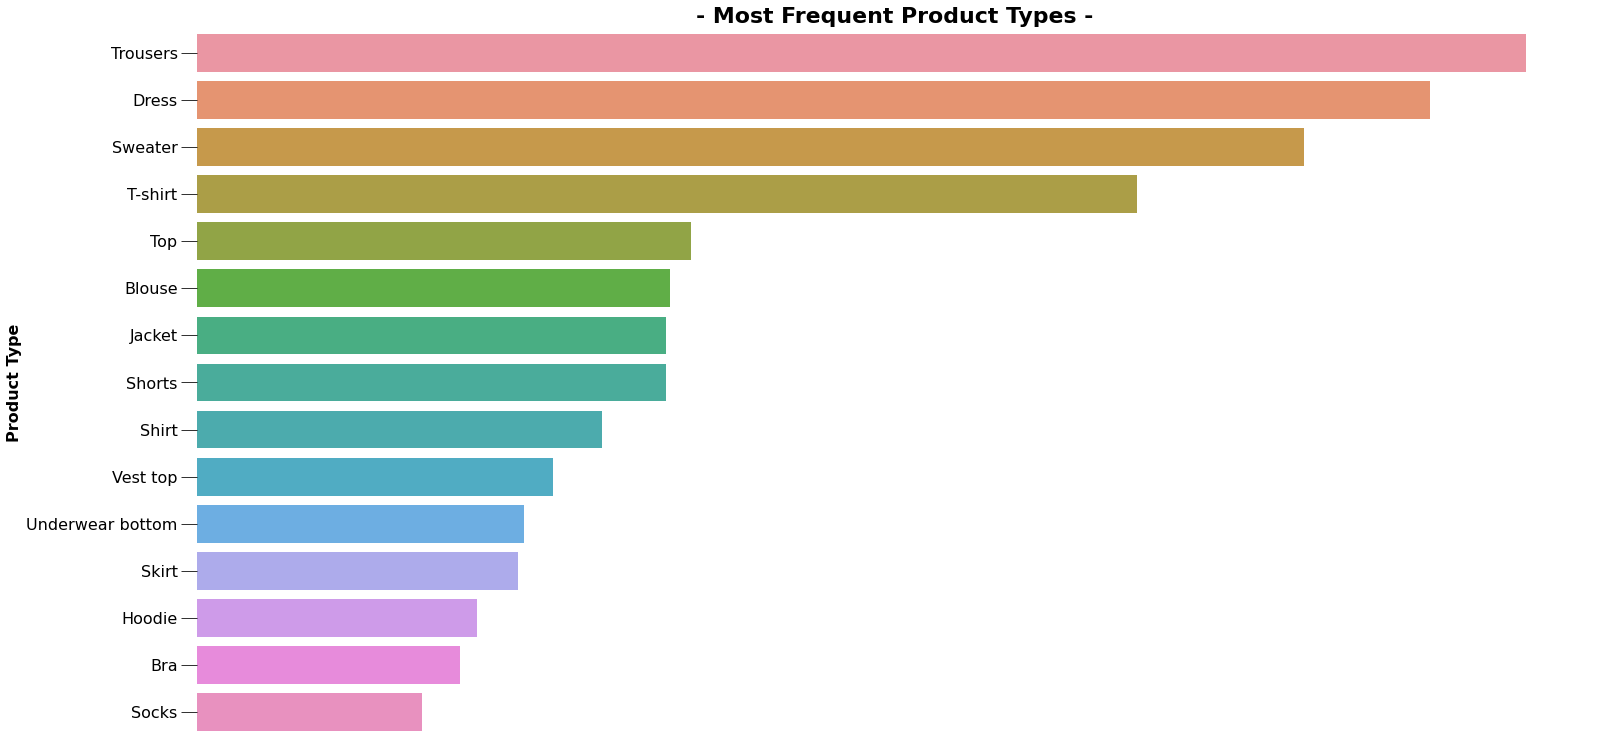

<Figure size 432x288 with 0 Axes>

In [8]:
# Data
prod_type = articles["product_type_name"].value_counts().reset_index().head(15)
total_prod_types = articles["product_type_name"].nunique()


# Plot
fig, ax = plt.subplots(figsize=(25, 13))
plt.title('- Most Frequent Product Types -', size=22, weight="bold")

sns.barplot(data=prod_type, x="product_type_name", y="index", ax=ax)
x0,x1 = ax.get_xlim()
y0,y1 = ax.get_ylim()

plt.ylabel("Product Type", size = 16, weight="bold")
plt.xlabel("")
plt.xticks([])
plt.yticks(size=16)
plt.tick_params(size=16)


sns.despine(left=True, bottom=True)
plt.show();

print("\n")



plt.tight_layout()
plt.show()

## EDA - Customers

In [9]:
customers.head()

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,NaN,NaN,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...


In [9]:
customers.describe(include='all')

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
count,1371980,476930.0,464404.0,1365918,1355971,1.356119e+06,1371980
unique,1371980,NaN,NaN,3,4,NaN,352899
top,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,NaN,2c29ae653a9282cce4151bd87643c907644e09541abc28...
freq,1,NaN,NaN,1272491,877711,NaN,120303
mean,NaN,1.0,1.0,NaN,NaN,3.638696e+01,NaN
std,NaN,0.0,0.0,NaN,NaN,1.431363e+01,NaN
min,NaN,1.0,1.0,NaN,NaN,1.600000e+01,NaN
25%,NaN,1.0,1.0,NaN,NaN,2.400000e+01,NaN
50%,NaN,1.0,1.0,NaN,NaN,3.200000e+01,NaN
75%,NaN,1.0,1.0,NaN,NaN,4.900000e+01,NaN


In [10]:
customers.isna().sum()

customer_id                    0
FN                        895050
Active                    907576
club_member_status          6062
fashion_news_frequency     16009
age                        15861
postal_code                    0
dtype: int64

In [13]:
customers.shape

(1371980, 7)

Since there is no difference between the number of rows and dist count of customer ids.. there are no duplicate rows. 

In [6]:
len(customers.customer_id.unique())

1371980

In [14]:
customers.columns

Index(['customer_id', 'FN', 'Active', 'club_member_status',
       'fashion_news_frequency', 'age', 'postal_code'],
      dtype='object')

In [7]:
customers.groupby(['fashion_news_frequency']).sum()

,FN,Active,age
fashion_news_frequency,,,
Monthly,829.0,798.0,33376.0
NONE,789.0,499.0,31154964.0
None,2.0,1.0,102.0
Regularly,475310.0,463106.0,17634417.0


FN is the number of customers who get the fashion news newsletter

In [27]:
customers.FN.value_counts(dropna=False)

NaN    895050
1.0    476930
Name: FN, dtype: int64

35% of customers recieve the fashion news letter

active is if the customer is active for communication

In [28]:
customers.Active.value_counts(dropna=False)

NaN    907576
1.0    464404
Name: Active, dtype: int64

34% of customers are active for communications

Found some info on H&M member benefits - https://www2.hm.com/en_us/member/info.html 

In [29]:
customers.club_member_status.value_counts(dropna=False)

ACTIVE        1272491
PRE-CREATE      92960
NaN              6062
LEFT CLUB         467
Name: club_member_status, dtype: int64

92% of customers are active club members, while 6.8% are in the pre-create stage.

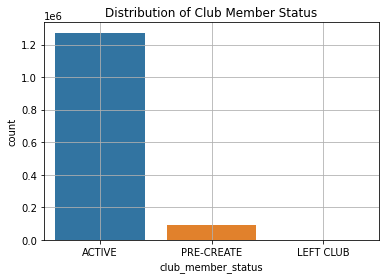

In [4]:
sns.countplot(data=customers,x = 'club_member_status',order=customers['club_member_status'].value_counts().index).set(title = 'Distribution of Club Member Status')
plt.grid()
plt.show()

In [30]:
customers.fashion_news_frequency.value_counts(dropna=False)

NONE         877711
Regularly    477416
NaN           16009
Monthly         842
None              2
Name: fashion_news_frequency, dtype: int64

64% of customers don't receive the fashion news, while 35% recieve it regularly.

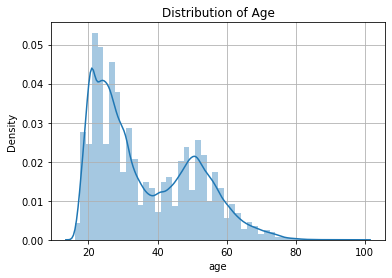

In [3]:
sns.distplot(customers['age']).set(title = 'Distribution of Age')
plt.grid()
plt.show()

In [39]:
print('The mean customer age for this dataset is {:f}'.format(customers.age.mean()))

The mean customer age for this dataset is 36.386965


In [4]:
customers_short = customers[['customer_id','FN','Active','fashion_news_frequency','age']]

In [9]:
customers_short_encod = pd.get_dummies(customers_short,columns=['FN','Active','fashion_news_frequency','age'],sparse= True)

In [10]:
customers_short_encod

,customer_id,FN_1.0,Active_1.0,fashion_news_frequency_Monthly,fashion_news_frequency_NONE,fashion_news_frequency_None,fashion_news_frequency_Regularly,age_16.0,age_17.0,age_18.0,...,age_90.0,age_91.0,age_92.0,age_93.0,age_94.0,age_95.0,age_96.0,age_97.0,age_98.0,age_99.0
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1371975,ffffbbf78b6eaac697a8a5dfbfd2bfa8113ee5b403e474...,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1371976,ffffcd5046a6143d29a04fb8c424ce494a76e5cdf4fab5...,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1371977,ffffcf35913a0bee60e8741cb2b4e78b8a98ee5ff2e6a1...,1,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1371978,ffffd7744cebcf3aca44ae7049d2a94b87074c3d4ffe38...,1,1,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0


Features to use from this dataset...
- age(of customer)
- FN(Fashion News) and Fashion News Frequency 
- Club Status 
- Active(for communications)

## EDA - Transactions

In [42]:
print(transactions.shape)
transactions.head()

(31788324, 5)


,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2


In [43]:
len(transactions.customer_id.unique())

1362281

In [5]:
#convert t_dat to a datetime 
transactions['transaction_date_time'] = pd.to_datetime(transactions["t_dat"])

#drop unneeded tables for model
transactions.drop(columns=['t_dat','price','sales_channel_id'],inplace=True,axis=0)

#create dataframe with just 2020 transactions
transactions_2020 = transactions[transactions['transaction_date_time'].dt.year == 2020]

transactions_2020.shape

(10980132, 3)

In [6]:
#aggregate transactions by customer id and article id 
transactions_2020_interaction = transactions_2020.groupby(['customer_id','article_id']).size().reset_index()
transactions_2020_interaction.shape

(9507837, 3)

In [7]:
#difference between org dataframe and aggregated dataframe 
transactions_2020.shape[0] - transactions_2020_interaction.shape[0]

1472295

In [8]:
transactions_2020_interaction.columns = ['customer_id','article_id','cust_art_int']

transactions_2020_interaction.head()

,customer_id,article_id,cust_art_int
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,568601043,1
1,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,795440001,1
2,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,841260003,1
3,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,859416011,1
4,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,887593002,1


In [ ]:
#create dataframes for just 2019 data 

transactions_2019 = transactions[transactions['transaction_date_time'].dt.year == 2019]

transactions_2019_interaction = transactions_2019.groupby(['customer_id','article_id']).size().reset_index()

transactions_2019_interaction.columns = ['customer_id','article_id','cust_art_int']